In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Install  UMAP and MAGIC for comparison
!pip install umap-learn magic-impute
!pip install scprep umap-learn magic-impute
#you need to install s_gd2 https://github.com/jxz12/s_gd2 #this is version (s-gd2==1.7) is stable
!pip install s-gd2==1.7
import requests
import os
import urllib.request
url_sc_phenix = 'https://raw.githubusercontent.com/resendislab/sc-PHENIX/main/sc-PHENIX%20tutorial%20colab/sc_PHENIX.py'
urllib.request.urlretrieve(url_sc_phenix, 'sc_PHENIX.py')
os.listdir()
!cd /content
!ls






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 959.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 810.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for s-gd2: filename=s_gd2-1.7-cp310-cp310-linux_x86_64.whl size=537553 sha256=58cfb1aa589afd4c3247e8187c424c2661065c0fd82d2095f1c34cf869a621d8
  Stored in directory: /root/.cache/pip/wheels/01/22/1b/8ad6ccdf7a37dbdd2a19afd4958d3b00516c88de69e5860f2d
Successfully built s-gd2
drive  sample_data  sc_PHENIX.py


# Data

In [2]:
import pandas as pd
import umap
import scprep
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Datos originales de microarreglos del desarrollo de C. Elegans

TrueEXpre = scprep.io.load_csv('/content/drive/MyDrive/Cristian Padrón/viernes 30 de oct/Supplementary_table_1.csv',cell_axis= 'row')
TrueEXpre = np.exp(TrueEXpre)

TrueEXpre = TrueEXpre.T

In [3]:
import pandas as pd
import numpy as np

def insertar_ceros_aleatorios(df, porcentaje=10, semilla=42):
    """
    Inserta ceros de manera aleatoria en un DataFrame basado en un porcentaje especificado y es reproducible por una semilla.

    Parámetros:
    df (pd.DataFrame): DataFrame original.
    porcentaje (int, opcional): Porcentaje de ceros a insertar. Por defecto es 10%.
    semilla (int, opcional): Semilla para el generador de números aleatorios. Por defecto es 42.

    Retorna:
    pd.DataFrame: DataFrame con ceros insertados aleatoriamente y reproducibilidad garantizada.
    """
    # Fijar la semilla del generador de números aleatorios para reproducibilidad
    np.random.seed(semilla)

    # Calcular el número total de elementos en el DataFrame
    total_elementos = df.size

    # Calcular el número de elementos a cambiar a cero
    num_ceros = int(total_elementos * (porcentaje / 100))

    # Generar pares de índices únicos
    indices = np.random.choice(total_elementos, num_ceros, replace=False)
    indices_fila = indices // df.shape[1]
    indices_columna = indices % df.shape[1]

    # Crear una copia del DataFrame para modificar
    df_modificado = df.copy()

    # Insertar ceros en los índices seleccionados
    df_modificado.values[indices_fila, indices_columna] = 0

    return df_modificado


In [ ]:
#dropout = insertar_ceros_aleatorios(TrueEXpre,porcentaje=60,  semilla=62)

# run_analysis(real=TrueEXpre, porcentaje=80, seed=62, t=5, knn=5, decay=5, npca_range=range(1, 200)



```python
import magic

magic_operator = magic.MAGIC(n_pca=param_value, t=t, knn=knn, decay=decay, random_state=1)
imputed_magic = magic_operator.fit_transform(dropout)

from sc_PHENIX import run_pca, sc_PHENIX

pca_data = run_pca(dropout, n_components=param_value, random_state=1)
umap_fit = umap.UMAP(n_components=30,n_epochs=3000,n_neighbors=220,negative_sample_rate=100,metric='cosine', random_state=1)
imputed_phenix = sc_PHENIX(dropout, u_no_3, t=t, knn=knn, decay=decay)


Processing KNN values:   0%|          | 0/95 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:10 2024


Processing KNN values:   1%|          | 1/95 [00:38<1:00:59, 38.93s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:16 2024


Processing KNN values:   2%|▏         | 2/95 [00:44<29:55, 19.31s/it]  /usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:22 2024


Processing KNN values:   3%|▎         | 3/95 [00:53<22:16, 14.53s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:30 2024


Processing KNN values:   4%|▍         | 4/95 [00:58<16:37, 10.96s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:35 2024


Processing KNN values:   5%|▌         | 5/95 [01:03<13:13,  8.81s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:41 2024


Processing KNN values:   6%|▋         | 6/95 [01:09<11:38,  7.85s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:46 2024


Processing KNN values:   7%|▋         | 7/95 [01:14<09:57,  6.79s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:51 2024


Processing KNN values:   8%|▊         | 8/95 [01:20<09:27,  6.52s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:32:58 2024


Processing KNN values:   9%|▉         | 9/95 [01:27<09:24,  6.57s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:04 2024


Processing KNN values:  11%|█         | 10/95 [01:32<08:59,  6.34s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:11 2024


Processing KNN values:  12%|█▏        | 11/95 [01:39<08:59,  6.43s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:15 2024


Processing KNN values:  13%|█▎        | 12/95 [01:44<08:05,  5.84s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:20 2024


Processing KNN values:  14%|█▎        | 13/95 [01:48<07:24,  5.42s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:26 2024


Processing KNN values:  15%|█▍        | 14/95 [01:54<07:31,  5.58s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:30 2024


Processing KNN values:  16%|█▌        | 15/95 [01:58<06:56,  5.21s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:34 2024


Processing KNN values:  17%|█▋        | 16/95 [02:03<06:30,  4.95s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:41 2024


Processing KNN values:  18%|█▊        | 17/95 [02:09<07:05,  5.46s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:45 2024


Processing KNN values:  19%|█▉        | 18/95 [02:14<06:34,  5.13s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:50 2024


Processing KNN values:  20%|██        | 19/95 [02:18<06:15,  4.94s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:33:55 2024


Processing KNN values:  21%|██        | 20/95 [02:24<06:23,  5.11s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:00 2024


Processing KNN values:  22%|██▏       | 21/95 [02:29<06:13,  5.05s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:05 2024


Processing KNN values:  23%|██▎       | 22/95 [02:33<06:04,  4.99s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:11 2024


Processing KNN values:  24%|██▍       | 23/95 [02:39<06:09,  5.13s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:15 2024


Processing KNN values:  25%|██▌       | 24/95 [02:43<05:49,  4.93s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:20 2024


Processing KNN values:  26%|██▋       | 25/95 [02:48<05:40,  4.87s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:25 2024


Processing KNN values:  27%|██▋       | 26/95 [02:53<05:44,  5.00s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:30 2024


Processing KNN values:  28%|██▊       | 27/95 [02:58<05:38,  4.98s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:35 2024


Processing KNN values:  29%|██▉       | 28/95 [03:03<05:32,  4.97s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:40 2024


Processing KNN values:  31%|███       | 29/95 [03:09<05:36,  5.09s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:45 2024


Processing KNN values:  32%|███▏      | 30/95 [03:13<05:18,  4.90s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:50 2024


Processing KNN values:  33%|███▎      | 31/95 [03:18<05:22,  5.04s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:34:56 2024


Processing KNN values:  34%|███▎      | 32/95 [03:24<05:23,  5.14s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:00 2024


Processing KNN values:  35%|███▍      | 33/95 [03:28<05:05,  4.93s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:05 2024


Processing KNN values:  36%|███▌      | 34/95 [03:33<05:01,  4.94s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:10 2024


Processing KNN values:  37%|███▋      | 35/95 [03:39<05:04,  5.08s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:15 2024


Processing KNN values:  38%|███▊      | 36/95 [03:43<04:49,  4.90s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:21 2024


Processing KNN values:  39%|███▉      | 37/95 [03:50<05:13,  5.40s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:26 2024


Processing KNN values:  40%|████      | 38/95 [03:55<05:01,  5.29s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:31 2024


Processing KNN values:  41%|████      | 39/95 [03:59<04:41,  5.02s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:36 2024


Processing KNN values:  42%|████▏     | 40/95 [04:05<04:44,  5.17s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:44 2024


Processing KNN values:  43%|████▎     | 41/95 [04:12<05:16,  5.86s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:48 2024


Processing KNN values:  44%|████▍     | 42/95 [04:16<04:48,  5.44s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:53 2024


Processing KNN values:  45%|████▌     | 43/95 [04:22<04:39,  5.37s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:35:58 2024


Processing KNN values:  46%|████▋     | 44/95 [04:27<04:27,  5.24s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:03 2024


Processing KNN values:  47%|████▋     | 45/95 [04:31<04:10,  5.02s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:08 2024


Processing KNN values:  48%|████▊     | 46/95 [04:37<04:16,  5.23s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:14 2024


Processing KNN values:  49%|████▉     | 47/95 [04:42<04:06,  5.13s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:18 2024


Processing KNN values:  51%|█████     | 48/95 [04:46<03:50,  4.91s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:23 2024


Processing KNN values:  52%|█████▏    | 49/95 [04:51<03:48,  4.97s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:28 2024


Processing KNN values:  53%|█████▎    | 50/95 [04:56<03:45,  5.01s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:33 2024


Processing KNN values:  54%|█████▎    | 51/95 [05:01<03:40,  5.02s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:38 2024


Processing KNN values:  55%|█████▍    | 52/95 [05:07<03:39,  5.09s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:43 2024


Processing KNN values:  56%|█████▌    | 53/95 [05:11<03:29,  4.99s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:48 2024


Processing KNN values:  57%|█████▋    | 54/95 [05:16<03:17,  4.82s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:53 2024


Processing KNN values:  58%|█████▊    | 55/95 [05:21<03:17,  4.94s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:36:58 2024


Processing KNN values:  59%|█████▉    | 56/95 [05:26<03:14,  4.99s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:03 2024


Processing KNN values:  60%|██████    | 57/95 [05:31<03:09,  4.98s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:08 2024


Processing KNN values:  61%|██████    | 58/95 [05:36<03:06,  5.05s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:13 2024


Processing KNN values:  62%|██████▏   | 59/95 [05:41<03:02,  5.06s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:18 2024


Processing KNN values:  63%|██████▎   | 60/95 [05:46<02:51,  4.89s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:23 2024


Processing KNN values:  64%|██████▍   | 61/95 [05:52<02:54,  5.12s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:28 2024


Processing KNN values:  65%|██████▌   | 62/95 [05:57<02:47,  5.07s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:33 2024


Processing KNN values:  66%|██████▋   | 63/95 [06:01<02:36,  4.90s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:38 2024


Processing KNN values:  67%|██████▋   | 64/95 [06:06<02:33,  4.95s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:43 2024


Processing KNN values:  68%|██████▊   | 65/95 [06:11<02:29,  4.97s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:47 2024


Processing KNN values:  69%|██████▉   | 66/95 [06:16<02:19,  4.80s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:53 2024


Processing KNN values:  71%|███████   | 67/95 [06:21<02:21,  5.07s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:37:58 2024


Processing KNN values:  72%|███████▏  | 68/95 [06:26<02:16,  5.07s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:03 2024


Processing KNN values:  73%|███████▎  | 69/95 [06:31<02:07,  4.90s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:07 2024


Processing KNN values:  74%|███████▎  | 70/95 [06:36<02:03,  4.94s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:13 2024


Processing KNN values:  75%|███████▍  | 71/95 [06:41<02:02,  5.12s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:18 2024


Processing KNN values:  76%|███████▌  | 72/95 [06:46<01:52,  4.91s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:22 2024


Processing KNN values:  77%|███████▋  | 73/95 [06:51<01:49,  4.97s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:28 2024


Processing KNN values:  78%|███████▊  | 74/95 [06:56<01:45,  5.00s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:32 2024


Processing KNN values:  79%|███████▉  | 75/95 [07:00<01:36,  4.84s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:37 2024


Processing KNN values:  80%|████████  | 76/95 [07:06<01:36,  5.07s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:43 2024


Processing KNN values:  81%|████████  | 77/95 [07:11<01:32,  5.14s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:48 2024


Processing KNN values:  82%|████████▏ | 78/95 [07:16<01:24,  4.95s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:52 2024


Processing KNN values:  83%|████████▎ | 79/95 [07:21<01:19,  5.00s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:38:58 2024


Processing KNN values:  84%|████████▍ | 80/95 [07:26<01:15,  5.05s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:03 2024


Processing KNN values:  85%|████████▌ | 81/95 [07:31<01:10,  5.02s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:08 2024


Processing KNN values:  86%|████████▋ | 82/95 [07:36<01:05,  5.06s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:13 2024


Processing KNN values:  87%|████████▋ | 83/95 [07:42<01:01,  5.14s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:18 2024


Processing KNN values:  88%|████████▊ | 84/95 [07:46<00:54,  4.95s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:23 2024


Processing KNN values:  89%|████████▉ | 85/95 [07:51<00:50,  5.00s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:29 2024


Processing KNN values:  91%|█████████ | 86/95 [07:57<00:47,  5.25s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:33 2024


Processing KNN values:  92%|█████████▏| 87/95 [08:02<00:40,  5.05s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:38 2024


Processing KNN values:  93%|█████████▎| 88/95 [08:07<00:35,  5.04s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:44 2024


Processing KNN values:  94%|█████████▎| 89/95 [08:12<00:30,  5.16s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:48 2024


Processing KNN values:  95%|█████████▍| 90/95 [08:17<00:24,  4.95s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:54 2024


Processing KNN values:  96%|█████████▌| 91/95 [08:22<00:20,  5.14s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:39:59 2024


Processing KNN values:  97%|█████████▋| 92/95 [08:27<00:15,  5.20s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:40:04 2024


Processing KNN values:  98%|█████████▊| 93/95 [08:32<00:10,  5.03s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:40:08 2024


Processing KNN values:  99%|█████████▉| 94/95 [08:37<00:05,  5.01s/it]/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Mon May 20 20:40:14 2024


Processing KNN values: 100%|██████████| 95/95 [08:43<00:00,  5.51s/it]


Results saved to analysis_results_t5_knn5-99_d5_seed62_por80_npca20.xlsx
      Method Parameter Value   Pearson  Spearman        R2
0  sc-PHENIX       KNN     5  0.235549  0.464526  0.055483
1  sc-PHENIX       KNN     5  0.362772  0.529875  0.131604
2  sc-PHENIX       KNN     5  0.306614  0.542542  0.094012
3  sc-PHENIX       KNN     5  0.438493  0.554791  0.192276
4  sc-PHENIX       KNN     5  0.409203  0.574371  0.167447


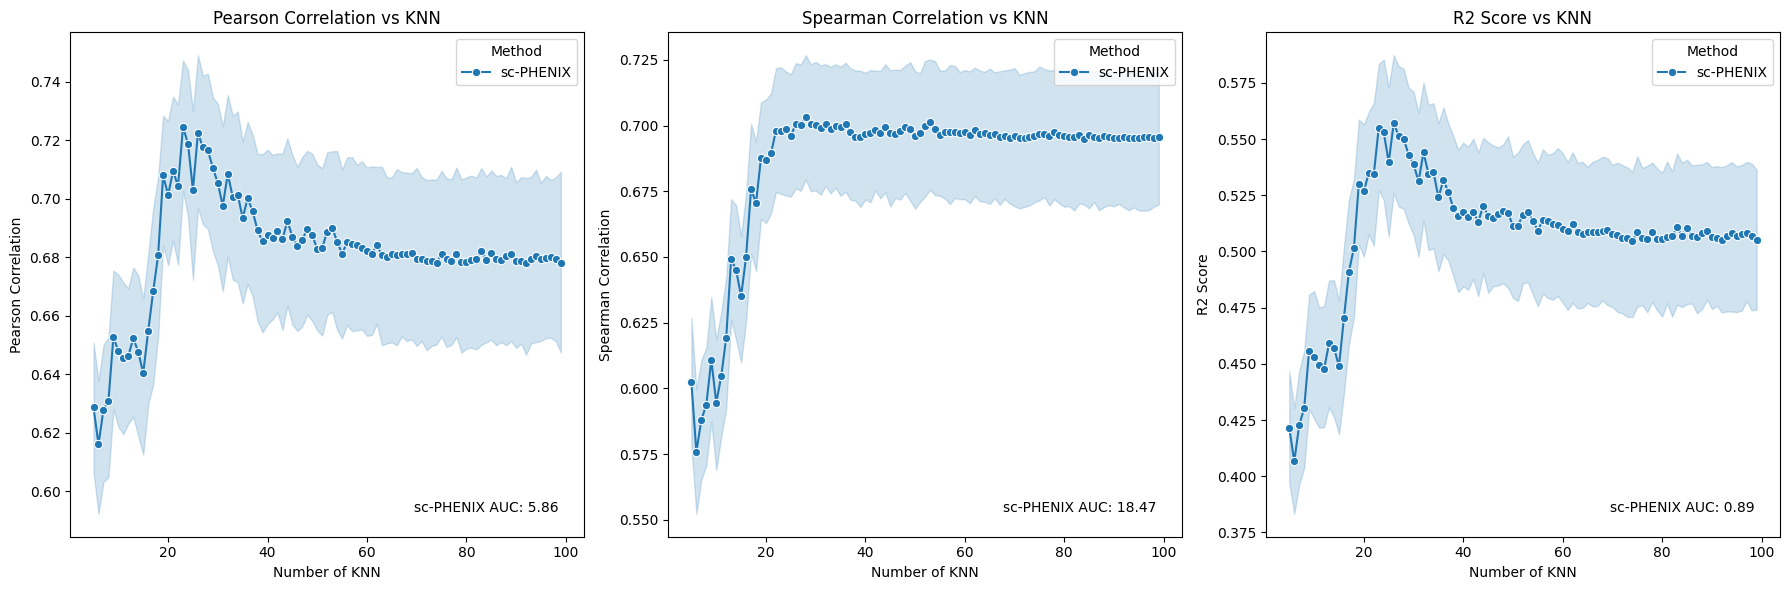

In [4]:
import pandas as pd
import numpy as np
import magic
import umap
from sc_PHENIX import sc_PHENIX
from scipy.stats import spearmanr
from sklearn.metrics import auc
from sklearn.manifold import SpectralEmbedding
from tqdm import tqdm  # Añadir barra de progreso
import matplotlib.pyplot as plt
import seaborn as sns

def insertar_ceros_aleatorios(real, porcentaje, semilla):
    np.random.seed(semilla)
    dropout = real.copy()
    mask = np.random.rand(*dropout.shape) < (porcentaje / 100.0)
    dropout[mask] = 0
    return dropout

def run_analysis(real=None, porcentaje=80, seed=62, t=5, knn_range=range(5, 10), decay=5, npca=20):
    np.random.seed(seed)

    # Asumiendo que `insertar_ceros_aleatorios` es una función definida para introducir dropout
    dropout = insertar_ceros_aleatorios(real, porcentaje=porcentaje, semilla=seed)
    real = real.to_numpy()  # Convertir el DataFrame de pandas a un array de numpy si aún no lo es

    # DataFrame para almacenar los resultados
    results = pd.DataFrame(columns=['Method', 'Parameter', 'Value', 'Pearson', 'Spearman', 'R2'])

    for knn in tqdm(knn_range, desc='Processing KNN values'):
        # Configurar y aplicar Laplacian Eigenmaps
        laplacian = SpectralEmbedding(n_components=npca, n_neighbors=knn, random_state=1)
        le_data = laplacian.fit_transform(dropout)

        # Configurar y aplicar sc-PHENIX
        umap_fit = umap.UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, metric='cosine', random_state=1)
        u_no_3 = umap_fit.fit_transform(le_data)
        imputed_phenix = sc_PHENIX(dropout, u_no_3, t=t, knn=knn, decay=decay)

        # Calcular métricas para sc-PHENIX
        new_rows = []
        for i in range(imputed_phenix.shape[0]):  # Asumiendo que imputed_phenix es un DataFrame
            real_sample = real[i, :]
            imputed_sample = imputed_phenix.iloc[i, :].to_numpy()  # Convertir la fila del DataFrame a numpy
            pearson = np.corrcoef(real_sample, imputed_sample)[0, 1]
            spearman = spearmanr(real_sample, imputed_sample).correlation
            r2 = pearson**2
            new_rows.append({'Method': 'sc-PHENIX', 'Parameter': 'KNN', 'Value': knn, 'Pearson': pearson, 'Spearman': spearman, 'R2': r2})

        results = pd.concat([results, pd.DataFrame(new_rows)], ignore_index=True)

    # Construyendo el nombre del archivo basado en todos los argumentos
    filename = f"analysis_results_t{t}_knn{knn_range.start}-{knn_range.stop-1}_d{decay}_seed{seed}_por{porcentaje}_npca{npca}.xlsx"
    results.to_excel(filename, index=False)
    print(f"Results saved to {filename}")

    return results

# Ejemplo de uso de la función con datos simulados
real_data =TrueEXpre # Datos simulados
results = run_analysis(real=real_data, porcentaje=80, seed=62, t=5, knn_range=range(5, 100), decay=5, npca=20)
print(results.head())

# Función para calcular el área bajo la curva
def calculate_auc(results, metric):
    methods = results['Method'].unique()
    auc_values = {}
    for method in methods:
        method_data = results[results['Method'] == method]
        x = method_data['Value']
        y = method_data[metric]
        auc_values[method] = auc(x, y)
    return auc_values

# Calcular AUC para cada métrica
auc_pearson = calculate_auc(results, 'Pearson')
auc_spearman = calculate_auc(results, 'Spearman')
auc_r2 = calculate_auc(results, 'R2')

# Mostrar los resultados en el gráfico
plt.figure(figsize=(18, 6))

# Subplot for Pearson correlation
plt.subplot(1, 3, 1)
sns.lineplot(data=results, x='Value', y='Pearson', hue='Method', marker='o')
plt.title('Pearson Correlation vs KNN')
plt.xlabel('Number of KNN')
plt.ylabel('Pearson Correlation')
for i, (method, auc_value) in enumerate(auc_pearson.items()):
    plt.text(0.95, 0.05 + i*0.05, f'{method} AUC: {auc_value:.2f}', ha='right', transform=plt.gca().transAxes)

# Subplot for Spearman correlation
plt.subplot(1, 3, 2)
sns.lineplot(data=results, x='Value', y='Spearman', hue='Method', marker='o')
plt.title('Spearman Correlation vs KNN')
plt.xlabel('Number of KNN')
plt.ylabel('Spearman Correlation')
for i, (method, auc_value) in enumerate(auc_spearman.items()):
    plt.text(0.95, 0.05 + i*0.05, f'{method} AUC: {auc_value:.2f}', ha='right', transform=plt.gca().transAxes)

# Subplot for R2 Score
plt.subplot(1, 3, 3)
sns.lineplot(data=results, x='Value', y='R2', hue='Method', marker='o')
plt.title('R2 Score vs KNN')
plt.xlabel('Number of KNN')
plt.ylabel('R2 Score')
for i, (method, auc_value) in enumerate(auc_r2.items()):
    plt.text(0.95, 0.05 + i*0.05, f'{method} AUC: {auc_value:.2f}', ha='right', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()



dont use the previus visualizacion ROC is bad calculated the next code is the correct onw

<ipython-input-6-d7827af945cf>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=results_new, x='Value', y='Pearson', hue='Method', marker='o', estimator='mean', ci=95)
<ipython-input-6-d7827af945cf>:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=results_new, x='Value', y='Spearman', hue='Method', marker='o', estimator='mean', ci=95)
<ipython-input-6-d7827af945cf>:89: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=results_new, x='Value', y='R2', hue='Method', marker='o', estimator='mean', ci=95)


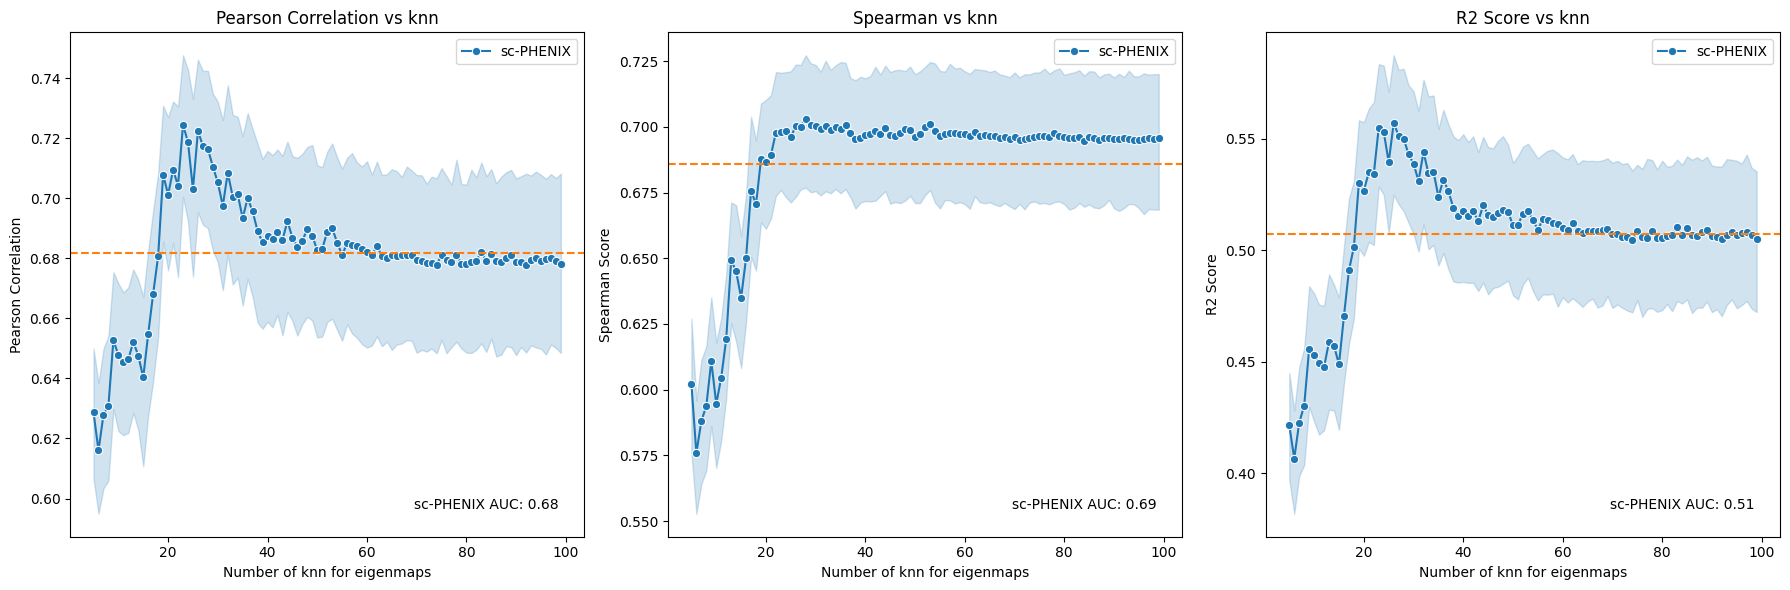

In [6]:
results_new = results.copy()


# Calculate the mean for each metric
mean_pearson = results_new.groupby('Method')['Pearson'].mean()
mean_spearman = results_new.groupby('Method')['Spearman'].mean()
mean_r2 = results_new.groupby('Method')['R2'].mean()


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

# Function to calculate and normalize AUC for the mean values of each method and plot the area under the curve
# with PCA components scaled to [0, 1] on the x-axis but keeping the original x-axis labels using seaborn
def calculate_auc_scaled(results):
    metrics = ['Pearson', 'Spearman', 'R2']
    auc_values = {metric: {} for metric in metrics}
    for metric in metrics:
        for method in results['Method'].unique():
            method_data = results[results['Method'] == method]
            mean_values = method_data.groupby('Value')[metric].mean()
            original_x = mean_values.index.values.astype(float)
            y = mean_values.values.astype(float)

            # Normalize x values to [0, 1]
            x_normalized = (original_x - original_x.min()) / (original_x.max() - original_x.min())

            # y values are already normalized
            y_normalized = y

            # Calculate AUC
            auc_value = auc(x_normalized, y_normalized)
            auc_values[metric][method] = auc_value
    return auc_values

# Calculate AUC for each metric over the full range using the scaled method
scaled_auc_values = calculate_auc_scaled(results_new)

# Calculate mean values for the methods to use in the legend
mean_pearson = results_new.groupby('Method')['Pearson'].mean()
mean_spearman = results_new.groupby('Method')['Spearman'].mean()
mean_r2 = results_new.groupby('Method')['R2'].mean()

# Plot the original visualization with the scaled AUC values and the adjusted legend
plt.figure(figsize=(18, 6))

# Subplot for Pearson correlation
plt.subplot(1, 3, 1)
sns.lineplot(data=results_new, x='Value', y='Pearson', hue='Method', marker='o', estimator='mean', ci=95)
plt.title('Pearson Correlation vs knn')
plt.xlabel('Number of knn for eigenmaps')
plt.ylabel('Pearson Correlation')



for i, (method, auc_value) in enumerate(scaled_auc_values['Pearson'].items()):
    plt.text(0.95, 0.05 + i * 0.05, f'{method} AUC: {auc_value:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
# Add mean lines without adding to legend
for method in mean_pearson.index:
    plt.axhline(mean_pearson[method], linestyle='--', color=sns.color_palette()[0 if method == 'MAGIC' else 1], label=f'{method} Mean')
# Manually adjust the legend to not include the mean lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_handles = [by_label[label] for label in by_label if 'Mean' not in label]
new_labels = [label for label in by_label if 'Mean' not in label]
plt.legend(new_handles, new_labels)

# Subplot for Spearman correlation
plt.subplot(1, 3, 2)
sns.lineplot(data=results_new, x='Value', y='Spearman', hue='Method', marker='o', estimator='mean', ci=95)
plt.title('Spearman vs knn')
plt.xlabel('Number of knn for eigenmaps')
plt.ylabel('Spearman Score')
for i, (method, auc_value) in enumerate(scaled_auc_values['Spearman'].items()):
    plt.text(0.95, 0.05 + i * 0.05, f'{method} AUC: {auc_value:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
# Add mean lines without adding to legend
for method in mean_spearman.index:
    plt.axhline(mean_spearman[method], linestyle='--', color=sns.color_palette()[0 if method == 'MAGIC' else 1], label=f'{method} Mean')
# Manually adjust the legend to not include the mean lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_handles = [by_label[label] for label in by_label if 'Mean' not in label]
new_labels = [label for label in by_label if 'Mean' not in label]
plt.legend(new_handles, new_labels)

# Subplot for R2 Score
plt.subplot(1, 3, 3)
sns.lineplot(data=results_new, x='Value', y='R2', hue='Method', marker='o', estimator='mean', ci=95)
plt.title('R2 Score vs knn')
plt.xlabel('Number of knn for eigenmaps')
plt.ylabel('R2 Score')
for i, (method, auc_value) in enumerate(scaled_auc_values['R2'].items()):
    plt.text(0.95, 0.05 + i * 0.05, f'{method} AUC: {auc_value:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes)
# Add mean lines without adding to legend
for method in mean_r2.index:
    plt.axhline(mean_r2[method], linestyle='--', color=sns.color_palette()[0 if method == 'MAGIC' else 1], label=f'{method} Mean')
# Manually adjust the legend to not include the mean lines
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_handles = [by_label[label] for label in by_label if 'Mean' not in label]
new_labels = [label for label in by_label if 'Mean' not in label]
plt.legend(new_handles, new_labels)

plt.tight_layout()
plt.show()

